# Lab 03 : K-NN graphs - solution

In [1]:
# Load libraries

# Math
import numpy as np

# Visualization 
%matplotlib notebook 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage

# High-res visualization (but no rotation possible)
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')

# Print output of LFR code
import subprocess

# Sparse matrix
import scipy.sparse
import scipy.sparse.linalg

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# Import data
import scipy.io

# Import functions in lib folder
import sys
sys.path.insert(0, 'lib/')

# Import helper functions
%load_ext autoreload
%autoreload 2
from lib.utils import compute_ncut
from lib.utils import reindex_W_with_classes
from lib.utils import nldr_visualization
from lib.utils import construct_knn_graph
from lib.utils import compute_purity

# Import distance function
import sklearn.metrics.pairwise

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

### Load 4K text documents of the 20NEWSGROUP dataset 

In [2]:
# Load 10 classes of 4,000 text documents
mat = scipy.io.loadmat('../../data/graph/20news_5classes_raw_data.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Cgt = mat['Cgt'] - 1; Cgt = Cgt.squeeze()
nc = len(np.unique(Cgt))
print('Number of data =',n)
print('Data dimensionality =',d);
print('Number of classes =',nc);

Number of data = 2000
Data dimensionality = 7939
Number of classes = 5


### Compute the k-NN graph (k=10) with L2/Euclidean distance<br>
Hint: You may use function *W=construct_knn_graph(X,k,'euclidean')*

In [3]:
# Your code here
W_euclidean = construct_knn_graph(X,10,'euclidean')
print('size of W=',W_euclidean.shape)

k-NN graph with euclidean distance
size of W= (2000, 2000)


### Plot the adjacency matrix of the graph. <br>
Hint: Use function *plt.spy(W, markersize=1)*

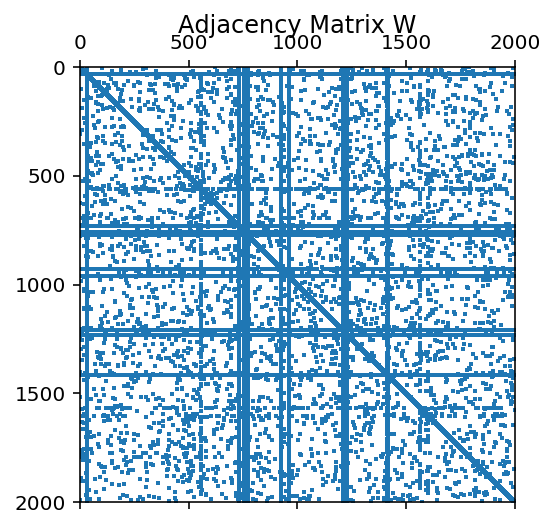

In [4]:
# Your code here
plt.figure(1)
plt.spy(W_euclidean, markersize=1)
plt.title('Adjacency Matrix W')
plt.show()

### Reindex the adjacency matrix of the graph w.r.t. ground truth communities. Plot the reindexed adjacency matrix of the graph.<br>
Hint: You may use the function *[W_reindex,C_classes_reindex]=reindex_W_with_classes(W,C_classes)*.

In [5]:
# Your code here
[reindexed_W_gt,reindexed_C_gt] = reindex_W_with_classes(W_euclidean,Cgt)

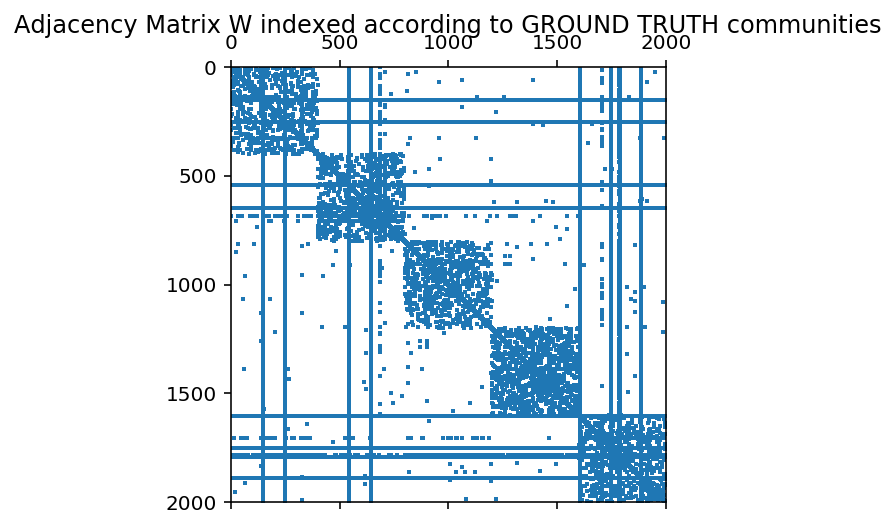

In [6]:
# Your code here
plt.figure(2)
plt.spy(reindexed_W_gt,markersize=1)
plt.title('Adjacency Matrix W indexed according to GROUND TRUTH communities')
plt.show()

### Perform graph clustering with NCut technique. What is the clustering accuracy of the NCut solution? What is the clustering accuracy of a random partition? Reindex the adjacency matrix of the graph w.r.t. NCut communities. Plot the reindexed adjacency matrix of the graph.<br>
Hints: You may use function *C_ncut, accuracy = compute_ncut(W,C_solution,n_clusters)* that performs Ncut clustering.<br>
You may use function *accuracy = compute_purity(C_computed,C_solution,n_clusters)* that returns the accuracy of a computed partition w.r.t. the ground truth partition. <br>
A random partition can be generated with the function *np.random.randint*.

accuracy NCut= 20.349999999999998
accuracy Random= 22.6


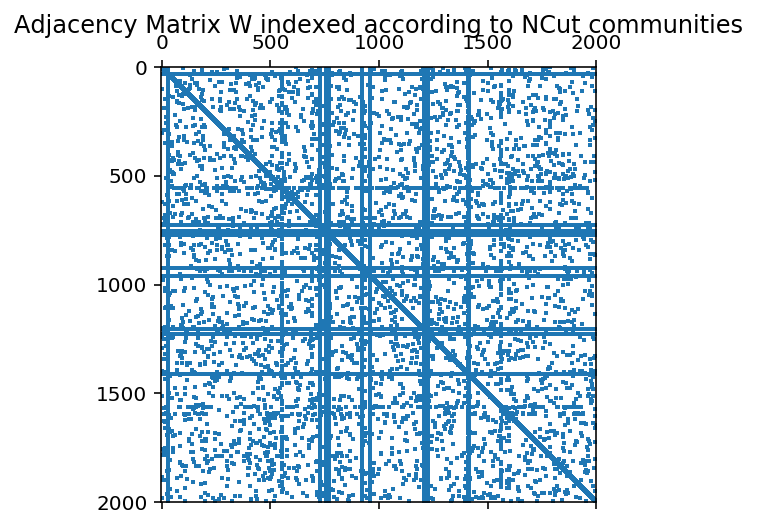

In [7]:
# Your code here
Cncut,acc = compute_ncut(W_euclidean, Cgt, nc)
print('accuracy NCut=',acc)

Crandom = np.random.randint(nc,size=(n,1))
acc = compute_purity(Crandom,Cgt,nc)
print('accuracy Random=',acc)

[reindexed_W_ncut,reindexed_C_ncut] = reindex_W_with_classes(W_euclidean,Cncut)

plt.figure(3)
plt.spy(reindexed_W_ncut, markersize=1)
plt.title('Adjacency Matrix W indexed according to NCut communities')
plt.show()

### Compute the k-NN graph (k=10) with Cosine distance.<br>
Answer the same questions as above for this new graph construction.<br>
Hint: You may use function *W=construct_knn_graph(X,10,'cosine')*.

In [8]:
# Reload data matrix
X = mat['X']

In [9]:
# Your code here
# Compute the k-NN graph with Cosine distance
W_cosine = construct_knn_graph(X,10,'cosine')
print('size of W=',W_cosine.shape)

k-NN graph with cosine distance
size of W= (2000, 2000)


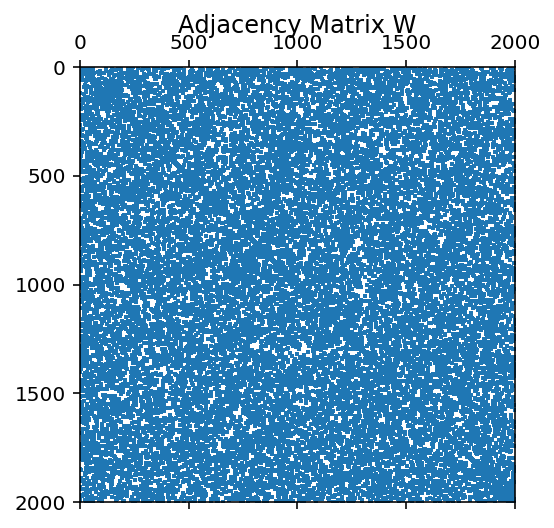

In [10]:
# Your code here
plt.figure(11)
plt.spy(W_cosine,precision=0.01, markersize=1)
plt.title('Adjacency Matrix W')
plt.show()

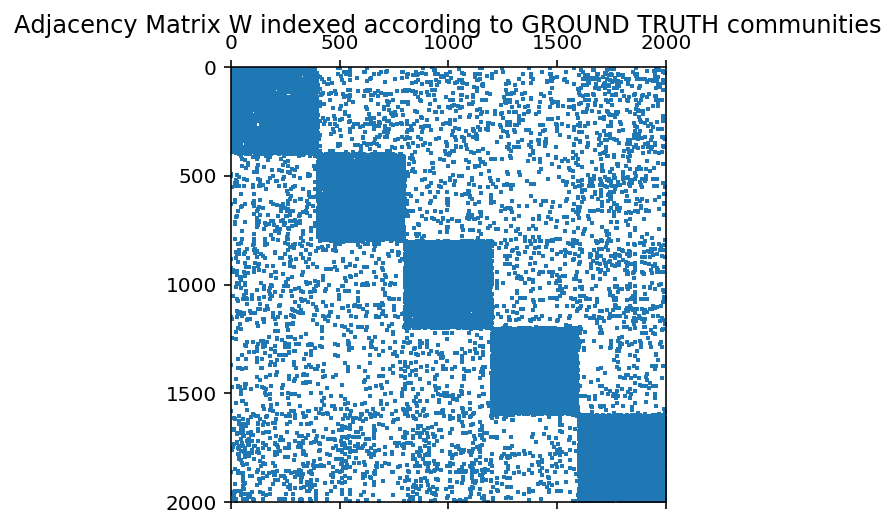

In [11]:
# Your code here
[reindexed_W_gt,reindexed_C_gt] = reindex_W_with_classes(W_cosine,Cgt)

plt.figure(12)
plt.spy(reindexed_W_gt,precision=0.01, markersize=1)
plt.title('Adjacency Matrix W indexed according to GROUND TRUTH communities')
plt.show()

accuracy NCut= 74.25
accuracy Random= 22.85


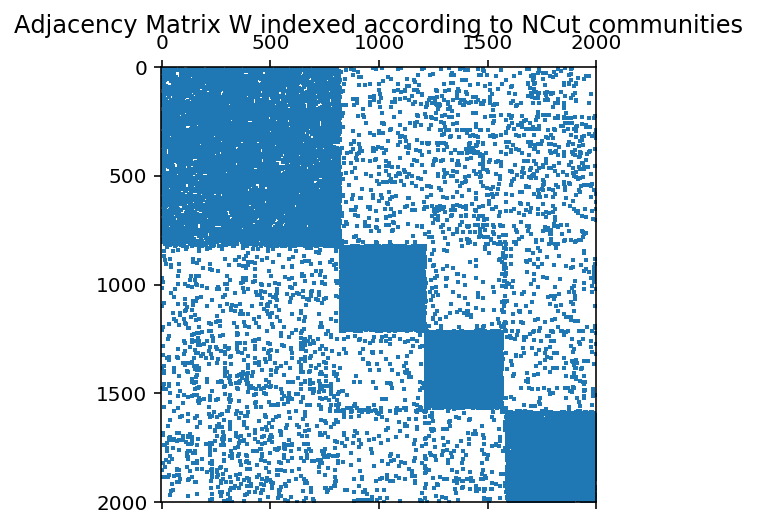

In [12]:
# Your code here
Cncut,acc = compute_ncut(W_cosine, Cgt, nc)
print('accuracy NCut=',acc)

Crandom = np.random.randint(nc,size=(n,1))
acc = compute_purity(Crandom,Cgt,nc)
print('accuracy Random=',acc)

[reindexed_W_ncut,reindexed_C_ncut] = reindex_W_with_classes(W_cosine,Cncut)

plt.figure(13)
plt.spy(reindexed_W_ncut,precision=0.01, markersize=1)
plt.title('Adjacency Matrix W indexed according to NCut communities')
plt.show()

### Visualize the adjacency matrix with the non-linear reduction technique in 2D and 3D. <br>
Hint: You may use function *[X,Y,Z] = nldr_visualization(W)*.<br>
Hint: You may use function *plt.scatter(X,Y,c=Cncut)* for 2D visualization and *ax.scatter(X,Y,Z,c=Cncut)* for 3D visualization.

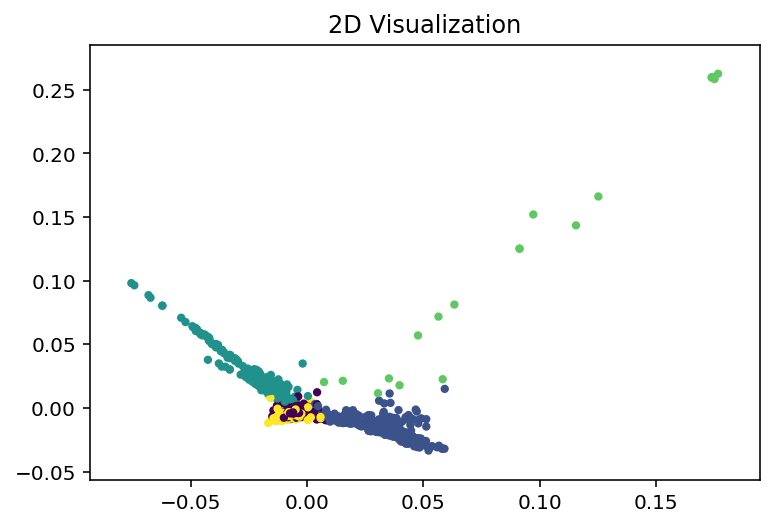

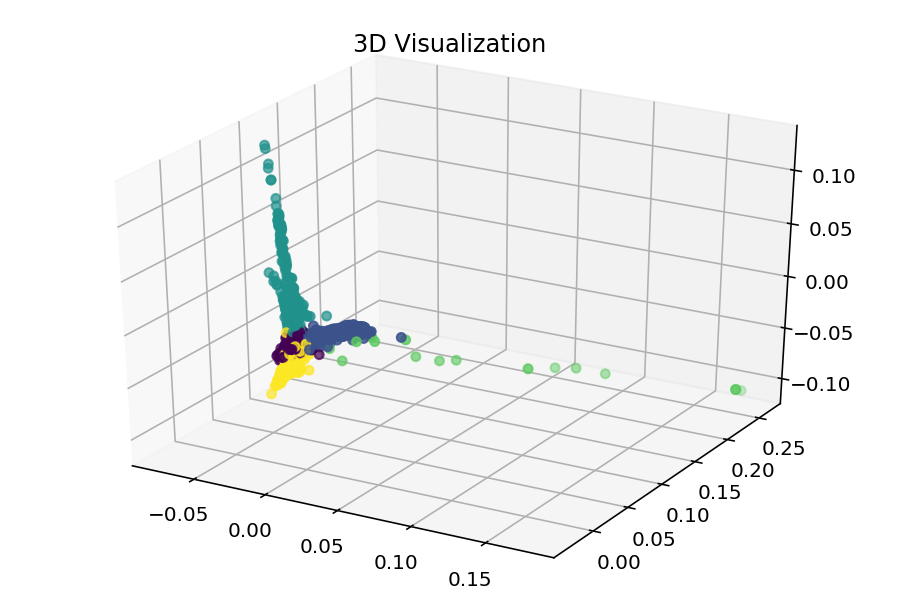

In [13]:
# Your code here
[X,Y,Z] = nldr_visualization(W_cosine)

plt.figure(14)
size_vertex_plot = 10
plt.scatter(X, Y, s=size_vertex_plot*np.ones(n), c=Cncut)
plt.title('2D Visualization')
plt.show()

# 3D Visualization
fig = pylab.figure(15)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Cncut)
pylab.title('3D Visualization')
pyplot.show()